In [62]:
pwd


'/Users/david'

In [63]:
from tensorflow import keras
import sklearn as sk
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# preprocessing data
training = pd.read_csv('~/Documents/working/brighton-a-memorable-city/training.csv')
test = pd.read_csv('~/Documents/working/brighton-a-memorable-city/testing.csv')
additional_training = pd.read_csv('~/Documents/working/brighton-a-memorable-city/testing.csv')
training = pd.concat([training, additional_training])
training.fillna(0,inplace=True)



test_features = test[test.columns]
test_f = pd.DataFrame(normalize(test_features, axis = 0) , columns = test_features.columns)

train, valid = train_test_split(training, test_size = 0.1)

train_t = normalize([[x] for x in train['prediction']])
valid_t = normalize([[x] for x in valid['prediction']]).T[0]

train_features = train[train.columns[:-1]]
valid_features = valid[valid.columns[:-1]]

train_f = pd.DataFrame(normalize(train_features, axis = 0) , columns = train_features.columns)
valid_f = pd.DataFrame(normalize(valid_features, axis = 0) , columns = valid_features.columns)


def neural_network():
    # container for each generated model that will be sorted by efficiency
    models = []
    histories = []

    # n1 => number of nodes in the first layer of the CVNN
    for n1 in [16, 32, 64, 128, 256, 512, 1024, 2048, 4056]:
        # n2 => number of nodes in the second layer of the CVNN
        for n2 in [16, 32, 64, 128, 256, 512, 1024, 2048, 4056]:
            # so build a sequential NN
            # (all nodes at layer 1 point to all nodes at layer 2)
            model = keras.Sequential([
                keras.layers.Dense(n1, activation='sigmoid'),
                keras.layers.Dense(n2, activation='sigmoid'),
                keras.layers.Dense(1, activation='sigmoid')
            ])

            # compiles the model, builds the neural network
            model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

            # ensures that the model can stop when appropriate
            early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10)
            # fit the model (tune each node) to the data
            history = model.fit(train_f.values, train_t, epochs=500, callbacks=[early_stopping])
            # evaluate the result of the tuned model with the given parameters
            loss, accuracy, binary_crossentropy = model.evaluate(valid_f.values, valid_t)
            # make predictions of based on the test set of data
            prediction = model.predict(valid_f.values)
    
            # retrieve the f1 score
            f1 = sk.metrics.f1_score(valid_t, np.round(prediction), average="macro")
    
            # add the model to the models container
            models.append([model, f1, accuracy, n1, n2])
            print(history)
            histories.append(history)
        
        # sort models based on f1-score
        models = sorted(models,key = lambda x: x[1],reverse=True)

        # return model at front of list
        return models[0], histories

#best_model, histories = neural_network()
#print(best_model)

#test_prediction = best_model[0].predict(test_f.values)
# f1 = sk.metrics.f1_score(test_t, np.round(test_prediction), average="macro")



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [64]:
best_model, histories = neural_network()
print(best_model)

test_prediction = best_model[0].predict(test_f.values)
# f1 = sk.metrics.f1_score(test_t, np.round(test_prediction), average="macro")

Epoch 1/500
341/341 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.9230 - binary_crossentropy: 0.2482
Epoch 2/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9825 - binary_crossentropy: 0.0935
Epoch 3/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9825 - binary_crossentropy: 0.0883
Epoch 4/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9825 - binary_crossentropy: 0.0873
Epoch 5/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9825 - binary_crossentropy: 0.0853
Epoch 6/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9825 - binary_crossentropy: 0.0804
Epoch 7/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9825 - binary_crossentropy: 0.0766
Epoch 8/500
341/341 [==============================] - 1s 2ms/step - loss: 0.0738 -

In [65]:
roundingprediction=[]
for pred in test_prediction: 
    if pred < 1.3906116e-20:
        round1=0
        roundingprediction.append(round1)
    else:
        round1=1
        roundingprediction.append(round1)
        
    print(round1)
    

1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
0
0
1
1
0
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
0
0
1
1
1
1
1
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
0
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
1
0
1
1
0
1
1
1
0
0
0
1
1
0
1
0
1


In [66]:
test_prediction[1]

array([5.491802e-19], dtype=float32)

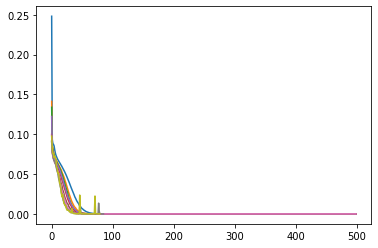

In [67]:
for i in range(len(histories)):
    plt.plot(range(len(histories[i].history['loss'])), histories[i].history['loss'])
plt.show()#regression of loss function(learning curve for each model, if =0,then better)

def produce_best_cnn(n1, n2):
    model = keras.Sequential([
                 keras.layers.Dense(n1, activation='sigmoid'),
                 keras.layers.Dense(n2, activation='sigmoid'),
                 keras.layers.Dense(1, activation='sigmoid')
             ])
            
    model.fit()
    return model

In [68]:
len(roundingprediction)

11874

In [69]:
f = open('roundingsubmission1.csv', 'w')
f.write('id,prediction\n')
for i in range(len(roundingprediction)):
    f.write(str(i) + ',' + str(roundingprediction[i]) + '\n')
f.close()

In [17]:
print(histories[0].history)



{'loss': [0.3677965998649597, 0.11235243827104568, 0.0936022698879242, 0.08959715068340302, 0.08859285712242126, 0.08812142163515091, 0.0871945172548294, 0.08435719460248947, 0.07951094955205917, 0.07577501237392426, 0.07316166907548904, 0.07119832932949066, 0.06948927044868469, 0.06786157190799713, 0.06658400595188141, 0.06510383635759354, 0.06381163001060486, 0.062226925045251846, 0.06028030067682266, 0.0583745576441288, 0.056798841804265976, 0.05452717840671539, 0.052360471338033676, 0.05018975958228111, 0.04869399219751358, 0.04576418548822403, 0.04342704638838768, 0.04083580523729324, 0.03854241594672203, 0.03578723967075348, 0.03346375375986099, 0.031182389706373215, 0.02920604683458805, 0.02690759114921093, 0.024555204436182976, 0.022187208756804466, 0.02052263170480728, 0.018357353284955025, 0.01652904972434044, 0.014939277432858944, 0.01319414284080267, 0.012125693261623383, 0.010364989750087261, 0.009402958676218987, 0.008243582211434841, 0.007448143791407347, 0.0063189580105

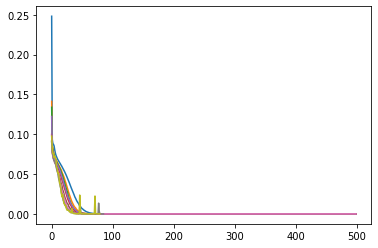

In [70]:
for i in range(len(histories)):
    plt.plot( range(len(histories[i].history['loss'])), histories[i].history['loss'])
plt.show()

In [72]:
#best_model = best_model[0]#
#print(best_model)

#test_prediction = best_model[0].predict(test_f.values)
